In [89]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import binom, norm, hypergeom

# Exercise 1

Wir spielen Roulette mit einem Einsatz von 5 € mit der Glückszahl 15. Die Wahrscheinlichkeiten und Auszahlungen beim Roulette sind in folgender Tabelle zusammengefasst:
Ereignis
Gewinnen Verlieren
Summe
175 € -5 €
Wahrscheinlichkeit
1/38 37/38
Die Tabelle zeigt, dass, wenn wir gewinnen würden, wir das 35-fache unseres Einsatzes (175 €) zurückbekämen. Die Wahrscheinlichkeit dafür ist allerdings nur 1/38. Wesentlich wahrscheinlicher ist es dagegen, dass wir verlieren, hier -5 € mit einer Wahrscheinlichkeit von 37/38.
Man führe mehrere solche Situationenfür das Roulettespiel durch und berechne anhand von Simulationen wie viel man im Mittel (durchschnittlich) in 10 Spielen verliert/gewinnt, wenn man immer als Glückszahl die 15 einsetzt.

In [12]:
win_probability = 1/38
lose_probability = 37/38
win_payout = 175
lose_payout = -5

total_winnings = 0

num_rounds = 10000

lucky_number = 15

for _ in range(num_rounds):
    outcome = random.randint(0, 37)
    
    if outcome == lucky_number:
        total_winnings += win_payout
    else:
        total_winnings += lose_payout

average_winnings = total_winnings / num_rounds

print(f"Average winnings over {num_rounds} rounds: {average_winnings}")
    

Average winnings over 10000 rounds: -0.644


# Exercise 2

Beim Herstellungsprozess einer Ware ist bekannt, dass 80% fehlerfrei, 15% mit leichten (vernachlässigbaren) Fehlern und 5% mit großen Fehlern hergestellt werden.
Zufallsgröße X = die Anzahl der Waren mit großen Fehlern von insgesamt 100 Waren aus dem Herstellungsprozess.
- a.  Man simuliere N=100 mögliche Werte der ZG X.
- b.  Welches ist die mittlere Anzahl M der Waren mit großen Fehlern (anhand der simulierten Daten)?
- c. Wie groß ist die theoretische Wahrscheinlichkeit , dass von den nächsten hergestellten 100 Exemplaren
dieser Ware
1) höchstens 3 
2) genau 10 
3) mindestens 4 große
Fehler besitzen?

In [16]:
prob_no_error = 0.80
prob_minor_error = 0.15
prob_major_error = 0.05

N = 100

simulated_values = []

for _ in range(N):
    large_errors = sum(random.choices([0, 1, 2], [prob_no_error, prob_minor_error, prob_major_error], k=100))
    simulated_values.append(large_errors)

mean_simulated_value = np.mean(simulated_values)
mean_simulated_value1 = sum(simulated_values) / N

print(f"Mean simulated value of large errors: {mean_simulated_value}")
print(f"Mean simulated value1 of large errors: {mean_simulated_value1}")

p_at_most_3 = sum(binom.pmf(k, 100, prob_major_error) for k in range(4))

p_exactly_10 = binom.pmf(10, 100, prob_major_error)

p_at_least_4 = 1 - sum(binom.pmf(k, 100, prob_major_error) for k in range(4))

print(f"The theoretical probability of at most 3 large errors is {p_at_most_3}")
print(f"The theoretical probability of exactly 10 large errors is {p_exactly_10}")
print(f"The theoretical probability of at least 4 large errors is {p_at_least_4}")

Mean simulated value of large errors: 25.72
Mean simulated value1 of large errors: 25.72
The theoretical probability of at most 3 large errors is 0.2578386591160164
The theoretical probability of exactly 10 large errors is 0.016715884095931423
The theoretical probability of at least 4 large errors is 0.7421613408839836


# Exercise 3

Die Lebensdauer eines elektronischen Gerätes werde als normalverteilt angenommen. Der Erwartungswert betrage 10000 Stunden, und die Standardabweichung 200 Stunden.
Zufallsgröße X = die Lebensdauer des elektronischen Gerätes.
 - a) Man simuliere N=10 mögliche Werte von X.
 - b) Wie groß ist die theoretische Wahrscheinlichkeit, dass ein zufällig der Produktion entnommenes
Fernsehgerät
1) mehr als 1500 Stunden;
2) höchstens 6500 Stunden;
3) zwischen 7500 und 10500 
Stunden läuft?

In [18]:
mean = 10000
std_dev = 200

N = 10

simulated_value_normal = np.random.normal(mean, std_dev, N)

print("a. Simulated value of X: ")
for value in simulated_value_normal:
    print(value)

p_more_than_1500 = 1 - norm.cdf(1500, mean, std_dev)

p_at_most_6500 = norm.cdf(6500, mean, std_dev)

p_between_7500_10500 = norm.cdf(10500, mean, std_dev) - norm.cdf(7500, mean, std_dev)

print(f"b. The probability that X is more than 1500 is {p_more_than_1500}")
print(f"b. The probability that X is at most 6500 is {p_at_most_6500}")
print(f"b. The probability that X is between 7500 and 10500 is {p_between_7500_10500}")

a. Simulated value of X: 
10274.492666747852
9774.103292285157
10083.621971844781
9958.466214420803
10143.193792468957
10277.832275056535
10061.559268562927
10357.032024555183
10070.636027672002
9957.798141419882
b. The probability that X is more than 1500 is 1.0
b. The probability that X is at most 6500 is 7.163458766235034e-69
b. The probability that X is between 7500 and 10500 is 0.9937903346742238


# Exercise 4

Betrachten wir die statistischen Daten aus einer Stichprobe:
309 , 333 , 309 , 330, 325, 325 , 325 , 333 , 314 , 314, 330, 314, 314, 330

vom Umfang n=14 für die Lebensdauer in Stunden einer bestimmten elektronischen Komponente. Diese Stichprobe dient zur Untersuchung des Merkmals (Zufallsgröße) X : die Lebensdauer der elektronischen Komponente.
- a) Welches ist die durchschnittliche Lebensdauer der Glühbirnen?
- b) Welches ist die empirische Standardabweichung?
- c) Man schätze anhand dieser Daten P(X>310).


In [19]:
data = [309, 333, 309, 330, 325, 325, 325, 333, 314, 314, 330, 314, 314, 330]

mean_lifetime = np.mean(data)

std_deviation = np.std(data, ddof=1)

count_X_gt_310 = sum(1 for i in data if i > 310)
estimate_prob_X_gt_310 = count_X_gt_310 / len(data)

print(f"Mean lifetime: {mean_lifetime}")
print(f"Standard deviation: {std_deviation}")
print(f"Estimated probability that X > 310: {estimate_prob_X_gt_310}")

Mean lifetime: 321.7857142857143
Standard deviation: 9.00579788827151
Estimated probability that X > 310: 0.8571428571428571


# Exercies 5

Stichprobenvariablen in Histogrammen dargestellt: für die im Vektor X gegebenen Daten zeichne man das Histogramm der absoluten, bzw. relativen Häufigkeiten. Man gebe an P(X<301).
X =[299, 299 , 297, 303 , 299, 301, 300, 297, 302, 303, 300, 299, 301, 302, 301, 299, 300, 297, 300, 300, 296, 303, 295, 295, 297]

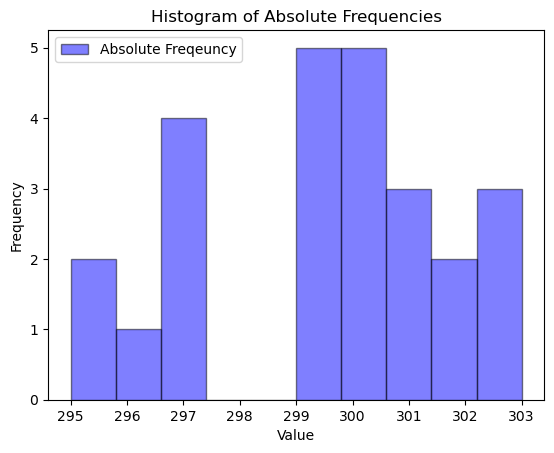

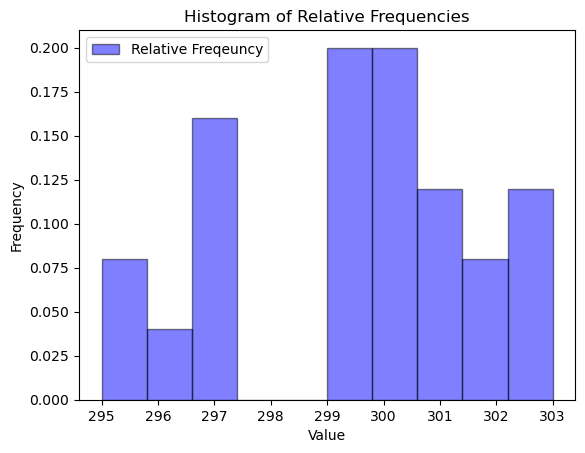

Probability that X < 301: 0.68


In [22]:
X = [299, 299, 297, 303, 299, 301, 300, 297, 302, 303, 300, 299, 301, 302, 301, 299, 300, 297, 300, 300, 296, 303, 295, 295, 297]

#Histogram of absolute frequencies

plt.hist(X, bins=10, alpha=0.5, color='b', edgecolor='black', label='Absolute Freqeuncy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Histogram of Absolute Frequencies")
plt.legend()
plt.show()
# print(np.ones(len(X)) / len(X))

#Histogram of relative frequencies

plt.hist(X, bins=10, alpha=0.5, color='b', edgecolor='black', weights=np.ones(len(X)) / len(X), label='Relative Freqeuncy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Histogram of Relative Frequencies")
plt.legend()
plt.show()

#Compute P(X < 301)

count_x_lt_301 = sum(1 for x in X if x < 301)
prob_x_lt_301 = count_x_lt_301 / len(X)

print(f"Probability that X < 301: {prob_x_lt_301}")

# Exercise 6

Eine Maschine produziert im Mittel 10mm lange Schrauben mit einer Standardabweichung von 1mm. Die Länge der Schrauben kann als normalverteilt angesehen werden. Anhand von 
a. Simulationen 
b. spezifischen Anweisungen berechne man die geschätzte bzw. theoretische Wahrscheinlichkeit dafür, dass
- eine Schraube kürzer ist als 9 mm;
- eine Schraube höchstens 10.1 mm und mindestens 8.9 mm lang ist;

In [24]:
mean_length = 10
std_deviation = 1
num_simulations = 100000

simulated_lengths = [np.random.normal(mean_length, std_deviation) for _ in range(num_simulations)]

#Compute estimated probabilities 
prob_shorter_than_9 = sum(1 for length in simulated_lengths if length < 9) / num_simulations
prob_between_8_9_and_10_1 = sum(1 for length in simulated_lengths if 8.9 <= length <= 10.1) / num_simulations

print(f"Probability that length is shorter than 9: {prob_shorter_than_9}")
print(f"Probability that length is between 8.9 and 10.1: {prob_between_8_9_and_10_1}")

#Compute theoretical probabilities
prob_theoretical_shorter_than_9 = norm.cdf(9, loc=mean_length, scale=std_deviation)

prob_theoretical_between_8_9_and_10_1 = norm.cdf(10.1, loc=mean_length, scale=std_deviation) - norm.cdf(8.9, loc=mean_length, scale=std_deviation)

print(f"Theoretical probability that length is shorter than 9: {prob_theoretical_shorter_than_9}")
print(f"Theoretical probability that length is between 8.9 and 10.1: {prob_theoretical_between_8_9_and_10_1}")

Probability that length is shorter than 9: 0.15694
Probability that length is between 8.9 and 10.1: 0.40557
Theoretical probability that length is shorter than 9: 0.15865525393145707
Theoretical probability that length is between 8.9 and 10.1: 0.40416177633064615


# Exercise 7

Man wählt zufällig Punkte im Inneren des Quadrats [0,2]x[0,2] (siehe das untere Bild). Man schätze durch Simulationen die Wahrscheinlichkeit, dass diese Punkte innerhalb des weißen Dreieckes sind. Man zeichne die Punkte im Inneren des weißen Dreiecks mit einer anderen Farben als die Punkte ausserhalb dieses Dreiecks. Welche ist die exakte (theoretische) Wahrscheinlichkeit? (Hinweis: man benutze die geometrische Wahrscheinlichkeit und man berechne die zugehörigen Flächeninhalte!)


# Exercise 8

Seien n=4, p=0.25, X~Bino(n,p), Y=X2 + 1. Man simuliere 1000 Werte für Y. Man erstelle das Histogramm der absoluten Häufigkeiten für Y. Man schätze P(Y>5). Man vergleiche die geschätzte Wahrscheinlichkeit mit der theoretischen Wahrscheinlichkeit.

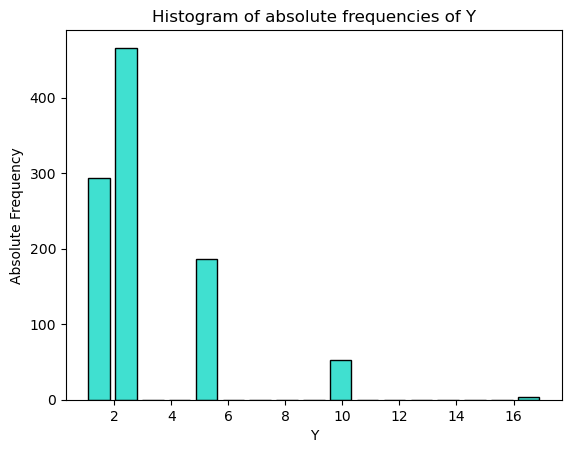

Estimated probability that Y > 5: 0.055
Theoretical probability that Y > 5: 0.0


In [32]:
n = 4
p = 0.25
simulations = 1000
X_values = np.random.binomial(n, p, simulations)
Y_values = X_values**2 + 1

plt.hist(Y_values, bins=max(Y_values), rwidth=0.8, color='turquoise', edgecolor='black')
plt.xlabel('Y')
plt.ylabel('Absolute Frequency')
plt.title('Histogram of absolute frequencies of Y')
plt.show()

estimated_probability = np.mean(Y_values > 5)

theoretical_probability = 1 - binom.cdf(5, n, p)

print(f"Estimated probability that Y > 5: {estimated_probability}")
print(f"Theoretical probability that Y > 5: {theoretical_probability}")

# Exercise 9

In einem Programm werden unabhängig voneinander 500 standardnormalverteilte Zufallsvariablen erzeugt und aufsummiert. Man schätze die Wahrscheinlichkeit dafür, dass die Summe der erzeugten Zufallsvariablen außerhalb des Intervalls [−20, 10] liegt. Man vergleiche das Ergebnis mit der theoretischen Wahrscheinlichkeit

Estimated probability that sum is outside [-20, 10]: 0.51137
Theoretical probability that sum is outside [-20, 10]: 0.5129071077706373


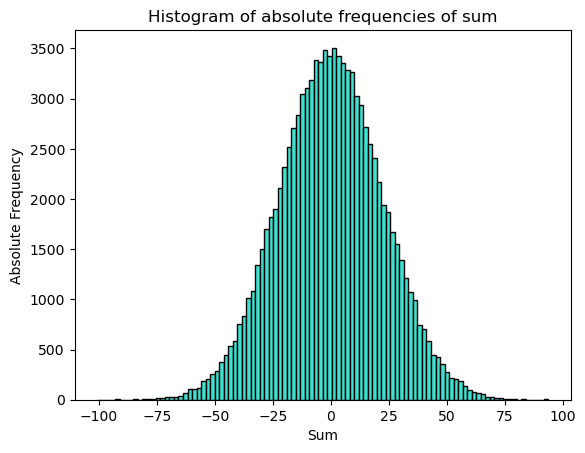

In [42]:
n_simulations = 100000
n_variables = 500

# Simulate the sum of 500 variables for each simulation

sums = np.random.normal(0, 1, (n_simulations, n_variables)).sum(axis=1)

#Compute the estimated probability

estimated_probability = np.mean((sums < -20) | (sums > 10))

print(f"Estimated probability that sum is outside [-20, 10]: {estimated_probability}")

#Compute the theoretical probability

theoretical_probability = norm.cdf(-20, loc=0, scale=np.sqrt(n_variables)) + (1- norm.cdf(10, loc=0, scale=np.sqrt(n_variables)))

print(f"Theoretical probability that sum is outside [-20, 10]: {theoretical_probability}")

plt.hist(sums, bins=100, color="turquoise", edgecolor="black")
plt.xlabel("Sum")
plt.ylabel("Absolute Frequency")
plt.title("Histogram of absolute frequencies of sum")
plt.show()


# Exercise 10

Die Zufallsvariable X sei normalverteilt mit Erwartungswert gleich 3 und Varianz gleich 4.
Man schätze P(|X| > 4) anhand von (a) Simulationen;
(b) spezifischen Anweisungen der Normalverteilung.

In [43]:
mean = 3
variance = 4
simulations = 10000

X_values = np.random.normal(mean, np.sqrt(variance), simulations)

estimated_probability = np.mean(X_values > 4)

print(f"Estimated probability: {estimated_probability}")

theoretical_probability = 1 - norm.cdf(4, loc=mean, scale=np.sqrt(variance))

print(f"Theoretical probability: {theoretical_probability}")

Estimated probability: 0.3092
Theoretical probability: 0.3085375387259869


# Exercise 11

In einer Urne befinden sich 6 rote, 4 weiße und 10 blaue Kugeln. Es werden vier Kugeln gezogen. Wie groß ist die Wahrscheinlichkeit, die Kugeln in der Reihenfolge „rot, weiß, blau, blau" zu ziehen, wenn die Kugeln nach der Ziehung
- a) zurückgelegt
- b) nicht zurückgelegt werden?
Man beantworte die Fragen anhand von Simulationen; welche sind die entsprechenden theoretischen Wahrscheinlichkeiten?

In [48]:
total_simulations = 10000
desired_sequence = ["rot", "weiss", "blau", "blau"]

urn=["rot"] * 6 + ["weiss"] * 4 + ["blau"] * 10

count_success_a = 0

for _ in range(total_simulations):
    drawn_balls = [random.choice(urn) for _ in range(4)]
    if drawn_balls == desired_sequence:
        count_success_a += 1

probability_estimated_a = count_success_a / total_simulations

count_success_b = 0

for _ in range(total_simulations):
    urn_copy = urn.copy()
    drawn_balls = []
    for _ in range(4):
        ball = random.choice(urn_copy)
        drawn_balls.append(ball)
        urn_copy.remove(ball)
    if drawn_balls == desired_sequence:
        count_success_b += 1

probability_estimated_b = count_success_b / total_simulations

probability_theoretical_b = count_success_b / total_simulations

probability_theoretical_a = (urn.count("rot") / len(urn)) * (urn.count("weiss") / len(urn)) * (urn.count("blau") / len(urn)) * (urn.count("blau") / len(urn))
probability_theoretical_b = (urn.count("rot") / len(urn)) * (urn.count("weiß") / (len(urn) - 1)) * (urn.count("blau") / (len(urn) - 2)) * (urn.count("blau") / (len(urn) - 3))


print(f"Estimated probability of a: {probability_estimated_a}")
print(f"Estimated probability of b: {probability_estimated_b}")
print(f"Theoretical probability of a: {probability_theoretical_a}")
print(f"Theoretical probability of b: {probability_theoretical_b}")


Estimated probability of a: 0.0143
Estimated probability of b: 0.0218
Theoretical probability of a: 0.015
Theoretical probability of b: 0.0


# Exercise 12

Ein sechsseitiger Würfel wird auf vier Seiten mit einer 1 und auf zwei Seiten mit einer 2 übermalt. Er wird zweimal geworfen.
1) Die Zufallsvariable X gibt die Summe der erhaltenen Zahlen an. Man gebe alle möglichen Werte von X an und die entsprechenden theoretischen Wahrscheinlichkeiten.
2) Anhand von Simulationen schätze man
- 2a) die zu erwartende Summe (d.h. E(X)) 
- 2b) die Wahrscheinlichkeit dafür, dass die Summe größer als 2 ist.

In [49]:
simulations = 100000
results = []

for _ in range(simulations):
    rolls = np.random.choice([1, 2], size=2, replace=True)
    results.append(sum(rolls))

expected_value = np.mean(results)

probaility_estimated = np.mean(np.array(results) > 2)

print(f"Estimated expected value: {expected_value}")
print(f"Estimated probability: {probaility_estimated}")

Estimated expected value: 3.00179
Estimated probability: 0.75183


# Exercise 14 ~ NU MERGE BINE 

Man schätze anhand von Simulationen die Wahrscheinlichkeit, dass man in einem Lottospiel (mit Zahlen von 1 bis 49, 6 Zahlen werden ohne Zurücklegen gezogen) genau 2 Zahlen richtig erratet.




In [59]:
n_simulations = 1000000

correct_numbers_to_win = 2

win_counts = []

for _ in range(n_simulations):
    drawn_numbers = set(random.sample(range(1, 50), 6))
    
    # Ziehen von 6 zufälligen Zahlen als Ihre "Vorhersage"
    your_numbers = set(random.sample(range(1, 50), 6))
    
    correct_count = len(drawn_numbers.intersection(your_numbers))

    if correct_numbers_to_win == correct_count:
        win_counts.append(1)


probability_estimated = np.mean(win_counts)

print(f"Estimated probability: {probability_estimated}")

Estimated probability: 1.0


# Exercise 15

Man würfelt mit einem Würfel so lange bis das erste Mal die 6 auftaucht. Anhand von Simulationen schätze man: wie oft muss man im Mittel (durchschnittlich) würfeln bevor erstmals die 6 auftaucht?

In [64]:
n_simulations = 10000

dice_rolls = []

for _ in range(n_simulations):
    diceroll = 0
    while True:
        diceroll += 1
        dice = random.randint(1, 6)
        if dice == 6:
            break

    dice_rolls.append(diceroll)

mean_dice_rolls = np.mean(dice_rolls)

print(f"Estimated mean number of dice rolls: {mean_dice_rolls}")

Estimated mean number of dice rolls: 6.0186


# Exercise 16

Sei X eine binomialverteile Zufallsgröße mit Parametern n=10, p=0.3. Man simuliere 1000 zufällige Werte für X. Man schätze 
- a) die Wahrscheinlichkeit, dass P(3< X< 7) 
- b) den Erwartungswert von X
- c) die Varianz von X. Man vergleiche die erhaltenen Ergebnisse mit den theoretischen Werten.

In [65]:
n = 10
p = 0.3 
n_simulations = 10000

count_between_3_and_7 = 0

for _ in range(n_simulations):
    x = np.random.binomial(n, p)
    if 3 < x < 7:
        count_between_3_and_7 += 1

probability_estimated = count_between_3_and_7 / n_simulations

simulated_X_values = [np.random.binomial(n, p) for _ in range(n_simulations)]
estimated_expected_value = np.mean(simulated_X_values)

estimated_variance = np.var(simulated_X_values)

#Theoretical expected value
theoretical_expected_value = n * p
theoretical_variance = n * p * (1 - p)
theoretical_probability_between_3_and_7 = sum(binom.pmf(k, n, p) for k in range(4, 7))

print(f"Estimated probability: {probability_estimated}")
print(f"Estimated expected value: {estimated_expected_value}")
print(f"Estimated variance: {estimated_variance}")

print(f"Theoretical expected value: {theoretical_expected_value}")
print(f"Theoretical variance: {theoretical_variance}")
print(f"Theoretical probability between 3 and 7: {theoretical_probability_between_3_and_7}")

Estimated probability: 0.3394
Estimated expected value: 2.9961
Estimated variance: 2.0986847900000005
Theoretical expected value: 3.0
Theoretical variance: 2.0999999999999996
Theoretical probability between 3 and 7: 0.33979720319999984


# Exercise 17

Einer von zwei Kandidaten (A und B) soll als Bürgermeister einer Stadt gewählt werden. Es ist bekannt dass Kandidat A 46% Chancen hat. Man simuliere Daten, die als Ergebnisse einer Umfrage sind, an der 500 Bürger einer Stadt befragt werden. Man schätze die Wahrscheinlichkeit, dass anhand der Daten mehr als 235 Bürger Kandidat A wählen möchten.


In [73]:
n_simulations = 10000

n_asked = 500
p_candidate_A = 0.46

count_more_than_235 = 0

for _ in range(n_simulations):
    
    ask_results = [random.random() < p_candidate_A for _ in range(n_asked)]

    votes_for_A = sum(ask_results)

    if votes_for_A > 235:
        count_more_than_235 += 1

probability_estimated = count_more_than_235 / n_simulations

print(f"Estimated probability: {probability_estimated}")

Estimated probability: 0.3196


# Exercise 18

Die Niederschlagsmenge (im Monat September) in einer bestimmten Region ist normal-verteilt und ist im Durchschnitt 60 Liter/Quadratmeter mit einer Standardabweichung von 5 Liter/Quadratmeter. Man simuliere 1000 (solche) statistische Daten. Man schätze anhand der Daten, die Wahrscheinlichkeit, dass die Niederschlagsmenge mehr als 55 Liter/Quadratmeter ist. Man vergleiche das geschätzte Ergebnis mit dem theoretischen Wert.


In [81]:
mean = 60
std_dev = 5

n_simulations = 1000

count_more_than_55 = 0

for _ in range(n_simulations):

    simulated_value = np.random.normal(mean, std_dev)

    if simulated_value > 55:
        count_more_than_55 += 1

probability_estimated = count_more_than_55 / n_simulations

print(f"Estimated probability: {probability_estimated}")

theoretical_probability_more_than_55 = 1 - norm.cdf(55, loc=mean, scale=std_dev)

print(f"Theoretical probability: {theoretical_probability_more_than_55}")

Estimated probability: 0.84
Theoretical probability: 0.8413447460685429


# Exercise 19

Bei einem Tenniswettbewerb gewinnt Spieler A in jedem Spiel mit einer Wahrscheinlichkeit von 60% gegen Spieler B. Der Spieler, der als erster 3 Spiele gewonnen hat, hat auch den Wettbewerb gewonnen. Man schätze anhand von N=2000 Simulationen die Gewinnwahrscheinlichkeiten des Wettbewerbs für Spieler A bzw. Spieler B.
(zB: BAABA → A hat gewonnen nach 5 Spielen; ABBAB → B hat gewonnen nach 5 Spielen; ABBB → B hat gewonnen nach 4 Spielen; BBB → B hat gewonnen nach 3 Spielen usw.)


In [82]:
n_simulations = 2000

p_a_wins = 0.6

number_of_games = 3

wins_a = 0
wins_b = 0

for _ in range(n_simulations):
    games_a = 0
    games_b = 0

    while games_a < number_of_games and games_b < number_of_games:
        if random.random() < p_a_wins:
            games_a += 1
        else:
            games_b += 1


    if games_a == number_of_games:
        wins_a += 1
    else:
        wins_b += 1

probability_estimated_a = wins_a / n_simulations
probability_estimated_b = wins_b / n_simulations

print(f"Estimated probability that A wins: {probability_estimated_a}")
print(f"Estimated probability that B wins: {probability_estimated_b}")

Estimated probability that A wins: 0.683
Estimated probability that B wins: 0.317


# Exercise 20

Ein „Glücksrad“ hat vier gleichgroße Felder. Eines davon ist das Gewinnfeld. Wie groß ist die Wahrscheinlichkeit, dass beim viermaligen Drehen mindestens einmal ein Gewinn gedreht wird? (Antwort anhand Simulationen)
Welche ist die theoretische Wahrscheinlichkeitsverteilung der Zufallsgröße X: Anzahl Gewinne in 4 Drehungen des Glücksrads.

In [84]:
n_simulations = 10000

number_of_sectors = 4 

number_of_spins = 4

wins = 0

for _ in range(n_simulations):

    spins = [random.randint(1, number_of_sectors) for _ in range(number_of_spins)]

    if 1 in spins:
        wins += 1

win_probability = wins / n_simulations

print(f"Estimated probability: {win_probability}")

Estimated probability: 0.6788


# Exercise 21

Peter trifft erfahrungsgemäß bei 85 % seiner Torschüsse vom Elfmeterpunkt. Wie groß ist die Wahrscheinlichkeit, dass er bei drei Versuchen mindestens einmal daneben schießt? (Antwort anhand Simulationen)
Welche ist die theoretische Wahrscheinlichkeitsverteilung der Zufallsgröße X: Anzahl der getroffenen Torschüsse von Peter vom Elfmeterpunkt in 3 Versuchen?

In [88]:
n_simulations = 10000

p_scoring = 0.85

number_of_attempts = 3

misses_at_least_once = 0


for _ in range(n_simulations):

    attempts = [random.random() > p_scoring for _ in range(number_of_attempts)]

    if any(attempts):
        misses_at_least_once += 1

miss_probability = misses_at_least_once / n_simulations

print(f"Estimated probability: {miss_probability}")

Estimated probability: 0.3961


# Exercise 23

 In einer Lostrommel sind 10 Gewinnlose und 30 Nieten. Wie groß ist die Wahrscheinlichkeit,
dass man bei dreimaligem Ziehen 
- a) mindestens ein Gewinnlos zieht? 
- b) nur Nieten zieht? Welche ist die theoretische Wahrscheinlichkeitsverteilung der Zufallsgröße X: Anzahl der Gewinnlose beim dreimaligen Ziehen?


In [90]:
M = 40
n_winning_tickets = 10
n_blanks = 30
n_draws = 3

probabability_at_least_one_winner = 1 - hypergeom.cdf(0, M, n_winning_tickets, n_draws)

probability_only_losers = hypergeom.pmf(0, M, n_blanks, n_draws)

print(f"Probability of at least one winner: {probabability_at_least_one_winner}")
print(f"Probability of only losers: {probability_only_losers}")

Probability of at least one winner: 0.5890688259109311
Probability of only losers: 0.012145748987854253


# Exercise 24

Tom schießt auf eine Zielscheibe, und die Wahrscheinlichkeit, mit der sein Schuss die Zielscheibe trifft, beträgt p=0.3 (leider ist Tom kein geübter Schütze). Er möchte die Wahrscheinlichkeit für die Anzahl X der Schüsse wissen, bis (inklusiv) er zum ersten Mal die Zielscheibe trifft.
- (1) Man zeichne das Histogramm der absoluten Häufigkeiten für die Zufallsgröße X.
- (2) Man bestimme wie viele Schüsse durchschnittlich geschossen werden bis Tom die Zielscheibe trifft. 
- (3) Man schätze P(X<5) und vergleiche diese mit der theoretischen Wahrscheinlichkeit.

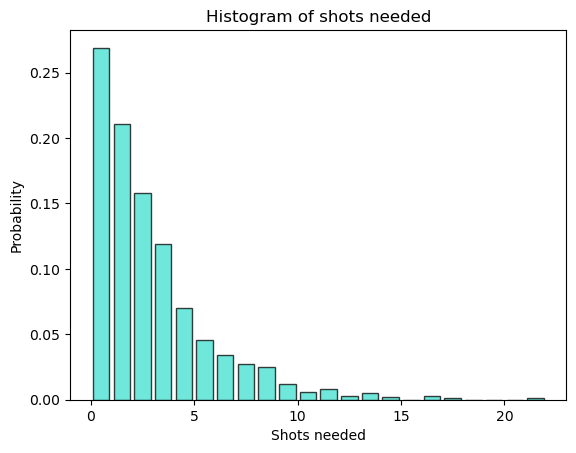

Estimated mean shots needed: 2.459
Estimated probability of less than 5 shots: 0.827
Theoretical probability of less than 5 shots: 0.7599


In [95]:
p = 0.3

n_simulations = 1000


shots_needed = []

for _ in range(n_simulations):
    shots = 0
    while random.random() > p:
        shots += 1
    shots_needed.append(shots)

plt.hist(shots_needed, bins=max(shots_needed), density=True, rwidth=0.8, alpha=0.75, color='turquoise', edgecolor='black')
plt.xlabel('Shots needed')
plt.ylabel('Probability')
plt.title('Histogram of shots needed')
plt.show()

mean_shots_needed = np.mean(shots_needed)
print(f"Estimated mean shots needed: {mean_shots_needed}")

count_less_than_5 = sum(1 for shots in shots_needed if shots < 5)
estimated_probability_less_than_5 = count_less_than_5 / n_simulations

print(f"Estimated probability of less than 5 shots: {estimated_probability_less_than_5}")


# theoretical_probability_less_than_5 = sum(binom.pmf(k, 5, p) for k in range(5))

theoretical_probability_less_than_5 = sum((1 - p)**k * p for k in range(4))


print(f"Theoretical probability of less than 5 shots: {theoretical_probability_less_than_5}")